<a href="https://colab.research.google.com/github/saipragna25/255-assignment4-extended/blob/main/DmAssignment_4_extension_dimensionality_reduction_techniques_on_tabular_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


## Loading the dataset

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [ ]:
# slicing the data 
X = X[0:2000,]
y = y[0:2000,]

#PCA

In [ ]:
sc = StandardScaler()
transformed_df = sc.fit_transform(X)

In [ ]:
covariance_matrix = np.cov(transformed_df.T)

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)


In [ ]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])


Eigenvalues arranged in descending order:
2.938085050199995
0.9201649041624864
0.1477418210449475
0.020853862176462696


In [ ]:
pca = PCA()


In [ ]:
pca = pca.fit(transformed_df)

In [ ]:
explained_variance = pca.explained_variance_ratio_

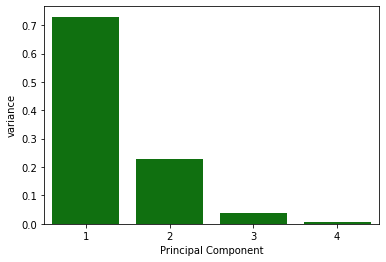

In [ ]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':[i+1 for i in range(4)]})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="g");

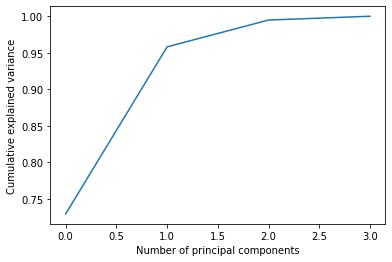

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [43]:
pca_2 = PCA(n_components =4)
pca_2 = pca_2.fit(transformed_df)
pca_2d = pca_2.transform(X)

## Below Plot clearly distributes the data

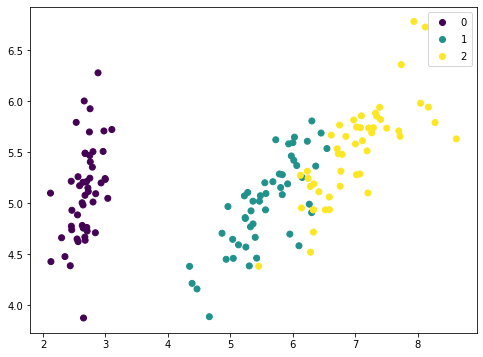

In [45]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(pca_2d[:,0], pca_2d[:,1],c=y)
plt.legend(*scatter.legend_elements())

#SVD

In [ ]:
u, s, v = np.linalg.svd(X, full_matrices=True)

In [ ]:
u.shape


(150, 150)

In [ ]:
s.shape

(4,)

In [ ]:
v.shape

(4, 4)

Text(0, 0.5, 'Percent of the variance explained')

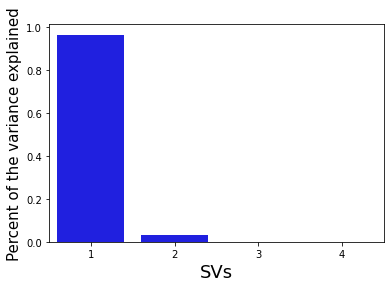

In [ ]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained[:10])+1)),
            y=variance_explained[:10], color="blue")
plt.xlabel('SVs', fontsize=18)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [ ]:
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=y.tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV1,SV2
0,0,-0.061617,0.129611
1,0,-0.058071,0.111020
2,0,-0.056763,0.117966
3,0,-0.056653,0.105308
4,0,-0.061230,0.131090



After applied dimensionality reduction, graph is clearly plotting the data distribution

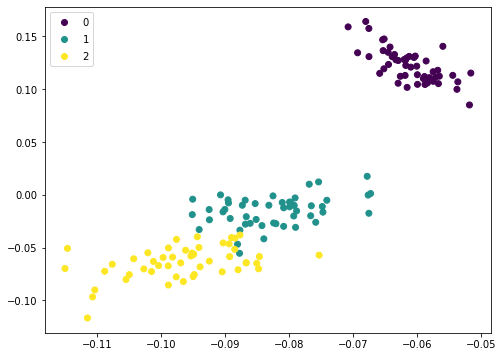

In [ ]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(svd_df['SV1'],svd_df['SV2'],c=svd_df['Class'])
plt.legend(*scatter.legend_elements())

#TSNE

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.667454
[t-SNE] KL divergence after 250 iterations with early exaggeration: 97.058968
[t-SNE] KL divergence after 300 iterations: 2.140204


Projection of data is not clear with TSNE

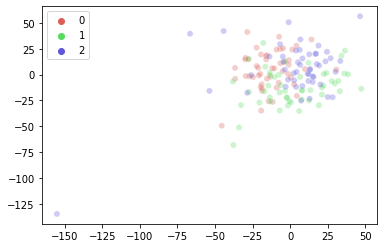

In [ ]:
tsne_1 = tsne_results[:,0]
tsne_2 = tsne_results[:,1]
#plt.figure(figsize=(18,12))
sns.scatterplot(
    x=tsne_1, y=tsne_2,
    hue=y,
    palette=sns.color_palette("hls", 3),
    data=X,
    legend="full",
    alpha=0.3
)


#ISOMAP

In [ ]:
from sklearn import manifold, datasets

In [ ]:
iris = datasets.load_iris()
isomap = manifold.Isomap(n_components=2)
new_dim = isomap.fit_transform(iris.data)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [ ]:
df = pd.DataFrame(new_dim, columns=['X', 'Y'])
df['label'] = iris.target
df.head()

,X,Y,label
0,-3.309251,-0.252219,0
1,-3.819231,-0.279292,0
2,-3.815531,-0.280693,0
3,-3.642930,-0.253199,0
4,-3.398217,-0.253639,0


This Technique is also distrubuted the data but not good with all features

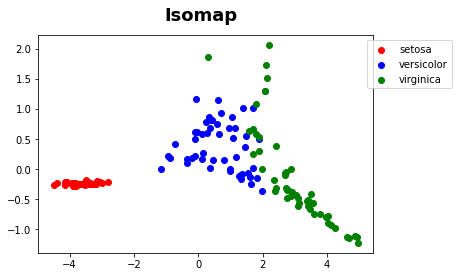

In [ ]:
fig = plt.figure()
fig.suptitle('Isomap', fontsize=18, fontweight='bold')
ax = fig.add_subplot(111)

plt.scatter(df[df.label == 0].X, df[df.label == 0].Y, color='red', label=iris.target_names[0])
plt.scatter(df[df.label == 1].X, df[df.label == 1].Y, color='blue', label=iris.target_names[1])
plt.scatter(df[df.label == 2].X, df[df.label == 2].Y, color='green', label=iris.target_names[2])

plt.legend(bbox_to_anchor=(1.25, 1))

#LLE

In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2)

In [ ]:
X_transformed = embedding.fit_transform(X)

Data distribution not clearly with LLE technique

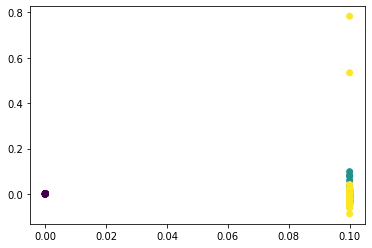

In [ ]:
scatter = plt.scatter(X_transformed.T[0], X_transformed.T[1],c=y)

#UMAP

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.8 MB/s 
     |████████████████████████████████| 1.1 MB 11.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=b27246dffe0bf5f7d20d94035fe2db906b119e24944c193c232f6c02edb2897f
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=77b1b2d2b6e61a4611d2a9b50c9eaaa2d447dff6b2579b30491c2eaab71023aa
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:

import umap
import time
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(X)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 12.806670188903809 seconds


In [ ]:
mapper = umap.UMAP().fit(X)

In [ ]:
!pip install "umap-learn[plot]"
import colorcet
import holoviews as hv
import sklearn.decomposition
import umap.plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 175 kB/s 
     |████████████████████████████████| 76 kB 4.7 MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59439 sha256=7f50dda399e17f360f886c7065bacbf467aefc90515db88be03026b20253c0b1
  Stored in directory: /root/.cache/pip/wheels/6d/79/c4/c425774559165f472d32e5ef592ff9a71179abb31f05dbc98b
Successfully built datashape


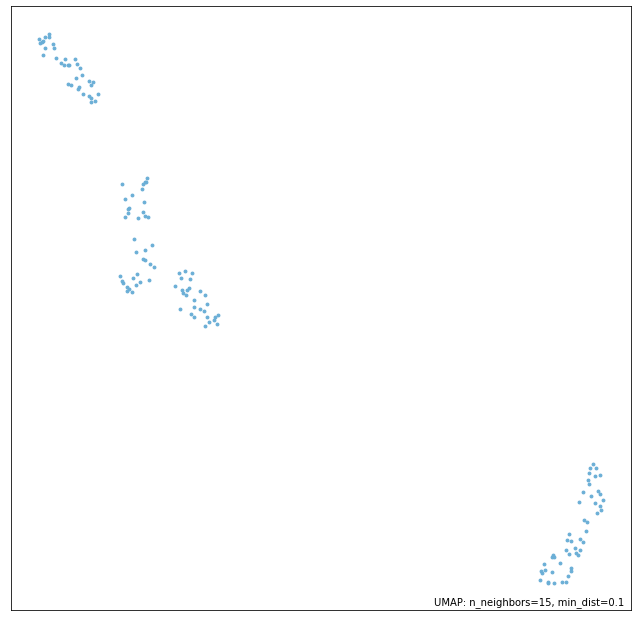

In [ ]:
umap.plot.points(mapper)


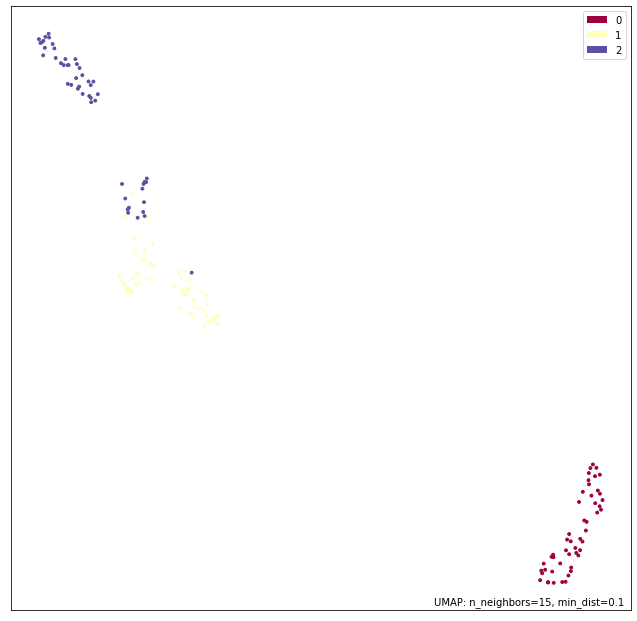

In [ ]:
umap.plot.points(mapper, labels=y)

 Therefore, Out of all in the Dimensionality Reduction techniques, it has been noted that the PCA, SVD, ISOMAP, UMAP projects the data clearly, however, LLE and TSNE did do well with tabular data.